In [233]:
#PROJECT FOR DATA ANALYSIS BY RISHABH SINGH

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [234]:
df_Swiggy=pd.read_csv('Swiggy_data.csv')
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [235]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [236]:
df_Swiggy.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [237]:
df_Swiggy.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [238]:
#Checking for unique ratings
df_Swiggy['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [239]:
#Replacing -- rating with zero
df_Swiggy['Rating']=df_Swiggy['Rating'].str.replace('--','0').astype(float)

In [240]:
#Checking for unique Cost for Two
df_Swiggy['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [241]:
#Removing the rupee symbol
df_Swiggy['Cost_for_Two']=df_Swiggy['Cost_for_Two'].apply(lambda x: int(x.strip('₹ ')))

In [242]:
#getting those rows with valid ratings
df_valid_ratings=df_Swiggy[df_Swiggy['Rating']>0]
df_valid_ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


<Axes: xlabel='Rating', ylabel='Density'>

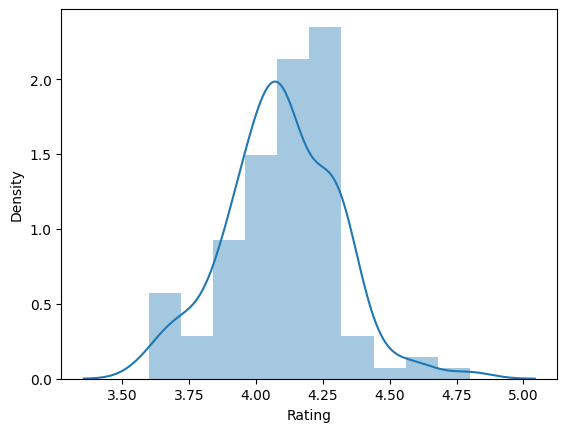

In [243]:
#Distribution of rating
sns.distplot(df_valid_ratings['Rating'])

In [244]:
#Looking at unique locations
df_Swiggy['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [245]:
#Cheking for locations containing Koramangala
df_Koramangala= df_Swiggy[df_Swiggy['Location'].str.contains(r'Koramangala')]
df_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [246]:
#Locations that contain HSR
df_HSR=df_Swiggy[df_Swiggy['Location'].str.contains(r'HSR')]
df_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


In [247]:
#Locations that contain BTM
df_BTM=df_Swiggy[df_Swiggy['Location'].str.contains(r'BTM')]
df_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


In [248]:
#Area wise analysis of ratings and cost

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

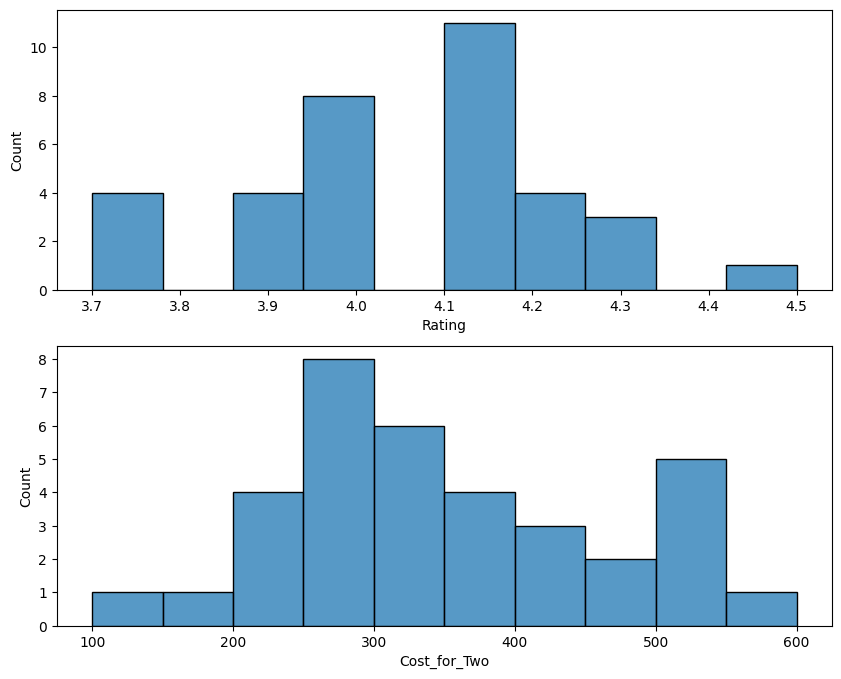

In [249]:
#BTM
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df_BTM['Rating'], bins=10)
plt.subplot(2,1,2)
sns.histplot(df_BTM['Cost_for_Two'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

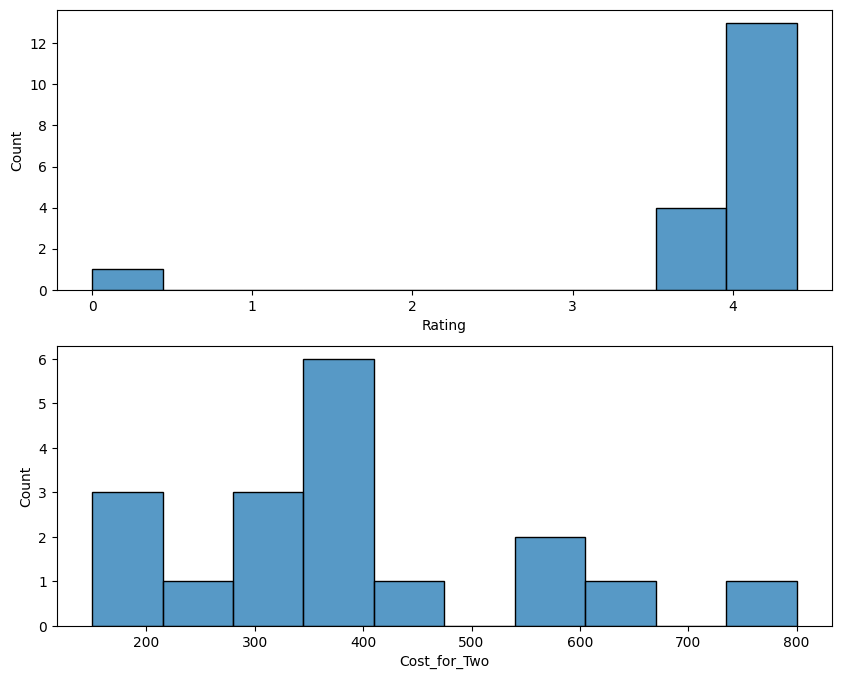

In [250]:
#HSR
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df_HSR['Rating'], bins=10)
plt.subplot(2,1,2)
sns.histplot(df_HSR['Cost_for_Two'],bins=10)

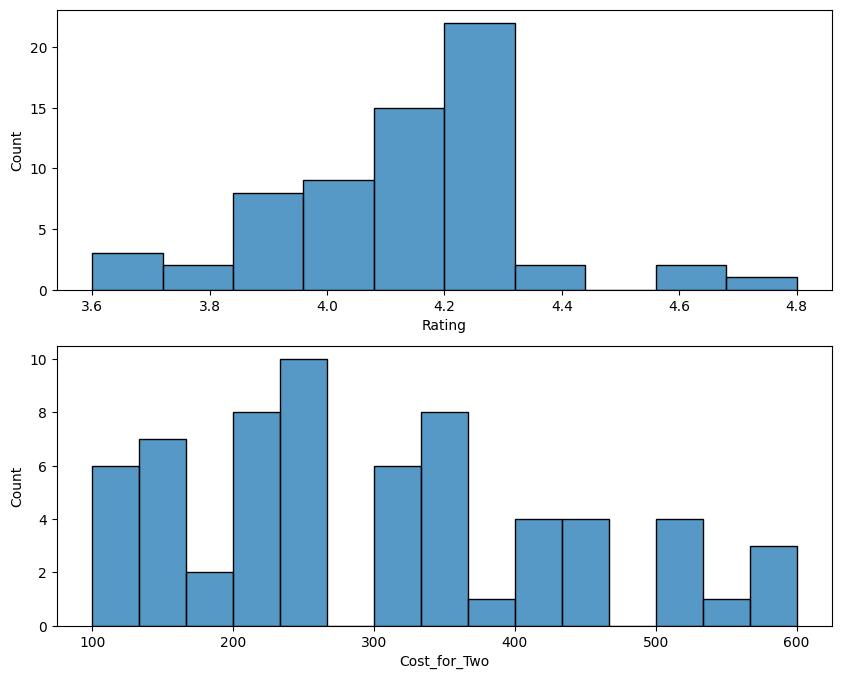

In [251]:
#Koramangala
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df_Koramangala['Rating'], bins=10)
plt.subplot(2,1,2)
sns.histplot(df_Koramangala['Cost_for_Two'],bins=15)
plt.show()

In [252]:
#Filtering out the highest rated restaurants
df_highest_rated=df_Swiggy[df_Swiggy['Rating']>=4.0]
df_highest_rated

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [253]:
df_highest_rated=df_highest_rated.loc[:,["Shop_Name","Rating","Cost_for_Two"]]
df_highest_rated

,Shop_Name,Rating,Cost_for_Two
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


In [254]:
#Grouping on Shop Name and Rating
df_highest_rated=df_highest_rated.groupby(['Shop_Name','Rating'])['Cost_for_Two'].agg('mean')
df_highest_rated=df_highest_rated.reset_index()
df_highest_rated

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [255]:
#making a scatter graph using plotly
fig=px.scatter(x=df_highest_rated['Cost_for_Two'],
               y=df_highest_rated['Rating'],
               color=df_highest_rated['Rating'],
               size=df_highest_rated['Cost_for_Two'],
               labels={
                   'x':'Approx Cost_for_Two',
                   'y':'Ratings',
                   'color':'Ratings_Indicator',
                },
            )
fig.update_layout(
    template='plotly_dark',
    title="Analyse 'Approx Cost for Two' VS 'Ratings'",
)
fig.show()

In [256]:
#Analyze Budgeted restaurants which are also high in rating
df_Affordable_rest=df_Swiggy[(df_Swiggy['Cost_for_Two']<=500)&(df_Swiggy['Rating']>=4.0)]
df_Affordable_rest

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [ ]:
#df_Affordable_rest=df_Affordable_rest.groupby(['Shop_Name','Rating'])['Cost_for_Two'].agg('mean')
df_Affordable_rest.reset_index()
df_Affordable_rest.sort_values(by='Rating', ascending=False, inplace=True)
df_Affordable_rest

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
94,Corner House Ice Cream,"Ice Cream, Desserts","7th Block, Koramangala",4.6,250
80,Chinese Bae,"Chinese, Thai","BTM, BTM",4.5,450
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
...,...,...,...,...,...
21,Maa Di Hatti,"Chinese, Healthy Food, North Indian","Jakkasandra Extn, Koramangala",4.0,129
58,Nanda's,"Andhra, Biryani","HSR, HSR",4.0,400
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400


In [258]:
df_Affordable_rest= df_Affordable_rest.loc[:,["Shop_Name","Rating","Cost_for_Two"]]
df_Affordable_rest

,Shop_Name,Rating,Cost_for_Two
78,Khichdi Experiment,4.8,200
82,Natural Ice Cream,4.6,150
94,Corner House Ice Cream,4.6,250
80,Chinese Bae,4.5,450
3,Al Daaz,4.4,400
...,...,...,...
21,Maa Di Hatti,4.0,129
58,Nanda's,4.0,400
57,Donne Biriyani House,4.0,300
22,Hotel Godavari,4.0,400


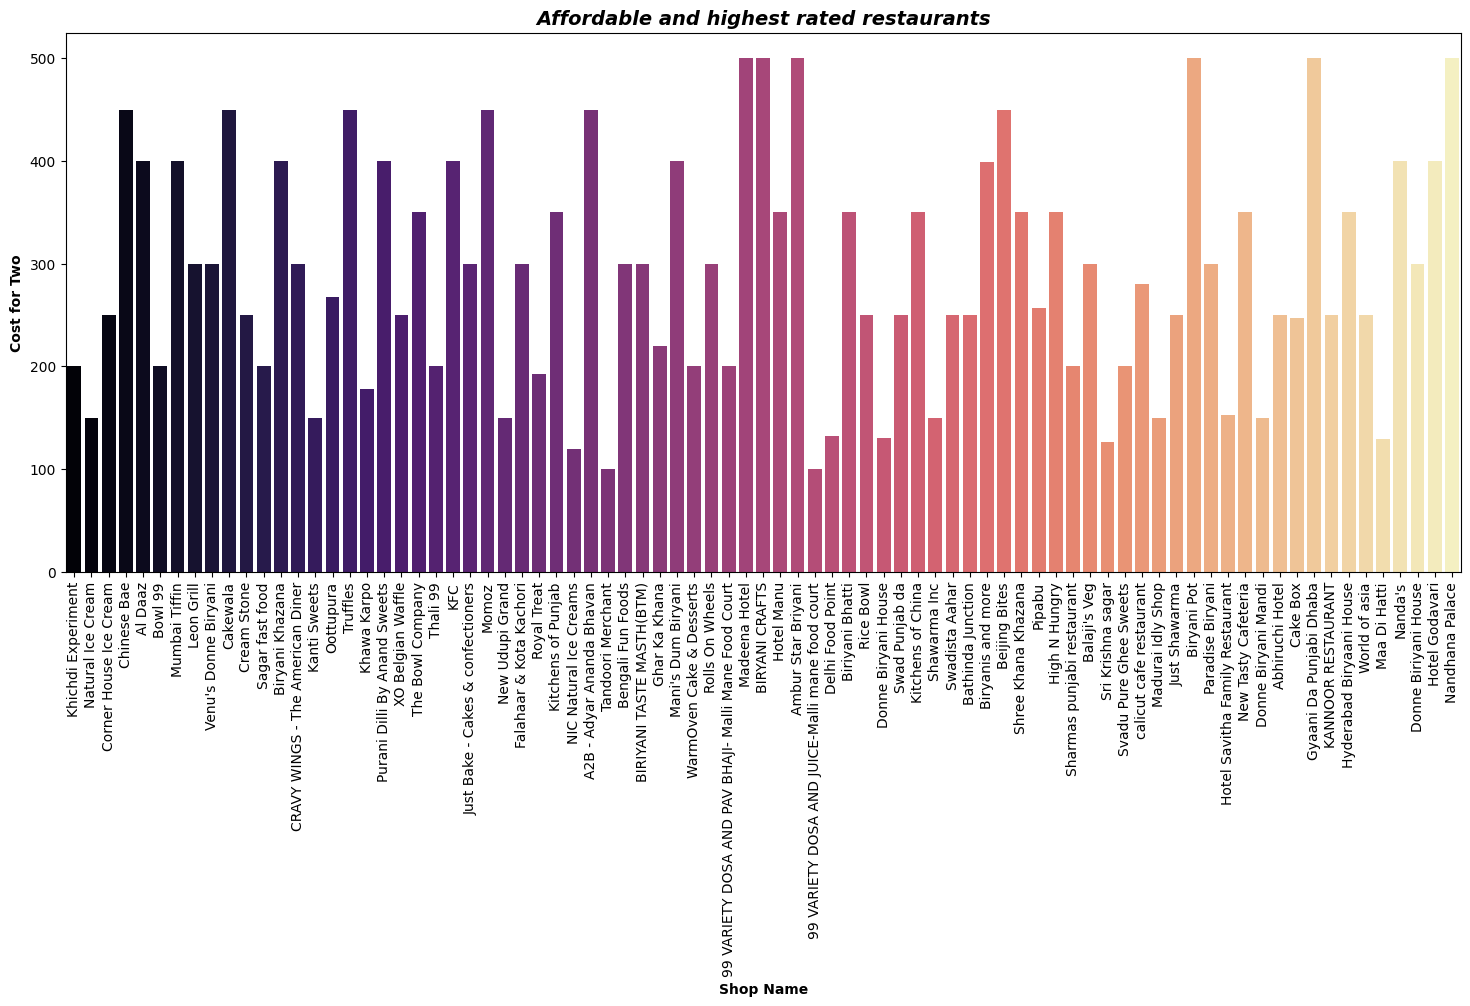

In [261]:
#plotting
plt.figure(figsize=(18,7))
sns.barplot(x=df_Affordable_rest['Shop_Name'],
            y=df_Affordable_rest['Cost_for_Two'],
            data=df_Affordable_rest,
            palette='magma')
plt.title('Affordable and highest rated restaurants',fontsize=14,fontweight='bold',fontstyle='italic')
plt.xlabel('Shop Name',fontsize=10,fontweight='bold')
plt.ylabel('Cost for Two',fontsize=10,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [262]:
#Cheapest Restaurants
df_cheap_rest=df_Affordable_rest.sort_values(by='Cost_for_Two',ascending=True)
df_cheap_rest

,Shop_Name,Rating,Cost_for_Two
89,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100
79,Tandoori Merchant,4.2,100
95,NIC Natural Ice Creams,4.2,120
2,Sri Krishna sagar,4.1,126
21,Maa Di Hatti,4.0,129
...,...,...,...
110,Biryani Pot,4.0,500
10,Ambur Star Briyani,4.1,500
92,BIRYANI CRAFTS,4.1,500
86,Gyaani Da Punjabi Dhaba,4.0,500


In [263]:
#Plotting for top 15
fig=px.bar(
    data_frame=df_cheap_rest,
    x=df_cheap_rest['Shop_Name'][0:15],
    y=df_cheap_rest['Cost_for_Two'][0:15],
    color=df_cheap_rest['Rating'][0:15],
    labels={
        'x':'Shop Name',
        'y':'Cost for Two',
        'color':'Rating',
    },
)
fig.update_layout(
    template='plotly_dark',
    title='Top 15 Cheapest and Highest Rated Restaurants',
)
fig.show()

In [264]:
#Top 15 expensive restaurants
df_exp_rest=df_highest_rated.sort_values(by='Cost_for_Two',ascending=False)
df_exp_rest

,Shop_Name,Rating,Cost_for_Two
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [265]:
#Plotting for top 15
fig=px.bar(
    data_frame=df_cheap_rest,
    x=df_exp_rest['Shop_Name'][0:15],
    y=df_exp_rest['Cost_for_Two'][0:15],
    color=df_exp_rest['Rating'][0:15],
    labels={
        'x':'Shop Name',
        'y':'Cost for Two',
        'color':'Rating',
    },
)
fig.update_layout(
    template='plotly_dark',
    title='Top 15 Expensive and Highest Rated Restaurants',
)
fig.show()

In [266]:
#Cuisine Analysis
df_Swiggy['Cuisine']=df_Swiggy['Cuisine'].str.title()
df_Swiggy['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [267]:
#Counter package
from collections import Counter
x=['hello','how','are','you','hello','how','are','you','now']
Counter(x)

Counter({'hello': 2, 'how': 2, 'are': 2, 'you': 2, 'now': 1})

In [269]:
#Counting the number of cuisines
freq={} #empty dict
for i in df_Swiggy['Cuisine'].unique():
    Cuisines_list=i.split(',') #separating by comma into a list
    for Cuisine in Cuisines_list:
        Cuisine=Cuisine.lstrip(' ') #removing space from the left
        if Cuisine in freq:
            freq[Cuisine]+=1
        else:
            freq[Cuisine]=1
print(freq)
print()
print('Total Record: \t',len(freq))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Record: 	 48


In [270]:
#Extracting Cuisine name and their Frequencies
Cuisine=freq.keys()
freq=freq.values()

df_Cuisine_analysis=pd.DataFrame() #empty DF

#Creating a df having two features --> Cuisine and Count
df_Cuisine_analysis['Cuisine']=Cuisine
df_Cuisine_analysis['Count']=freq
df_Cuisine_analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


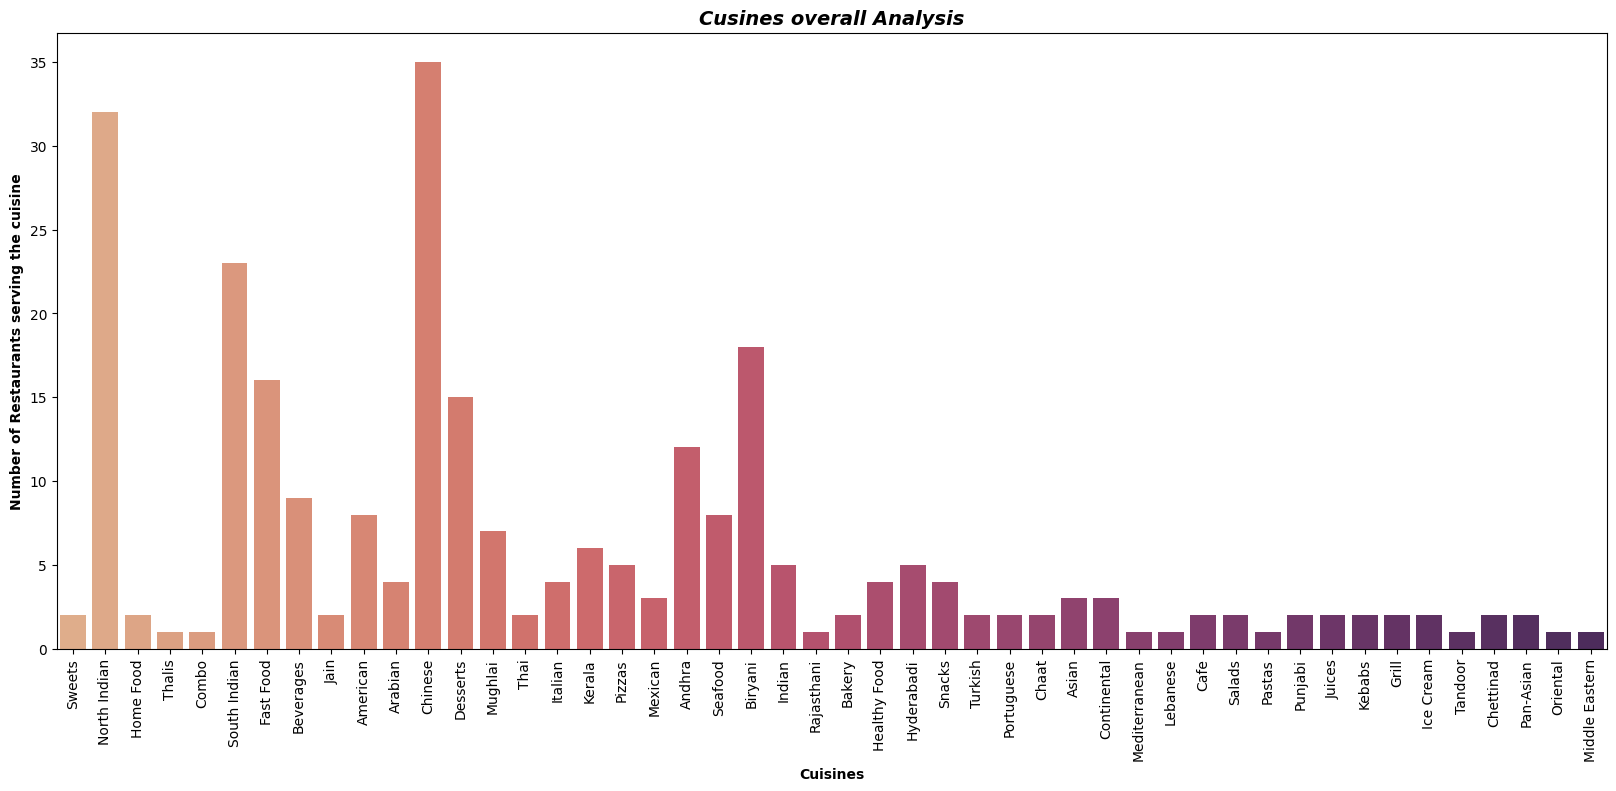

In [272]:
#plotting
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_analysis['Cuisine'],
            y=df_Cuisine_analysis['Count'],
            data=df_Cuisine_analysis,
            palette='flare')
plt.xticks(rotation=90)
plt.title('Cusines overall Analysis', fontsize=14,fontweight='bold',fontstyle='italic')
plt.xlabel('Cuisines',fontsize=10,fontweight='bold')
plt.ylabel('Number of Restaurants serving the cuisine',fontsize=10,fontweight='bold')
plt.show()

In [273]:
#Pie chart for top 10 Cuisines
fig=px.pie(data_frame=df_Cuisine_analysis,names=df_Cuisine_analysis['Cuisine'][:10],values=df_Cuisine_analysis['Count'][:10],
           title='Distribution of Cuisines in Restaurants',width=700,height=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [274]:
#AREA WISE CUISINE ANALYSIS

In [275]:
#Counting the number of cuisines in BTM area
freq_BTM={} #empty dict
for i in df_BTM['Cuisine'].unique():
    Cuisines_list=i.split(',') #separating by comma into a list
    for Cuisine in Cuisines_list:
        Cuisine=Cuisine.lstrip(' ') #removing space from the left
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine]+=1
        else:
            freq_BTM[Cuisine]=1
print(freq_BTM)
print()
print('Total Record: \t',len(freq_BTM))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

Total Record: 	 26


In [278]:
#Extracting Cuisine name and their Frequencies for BTM
Cuisine=freq_BTM.keys()
freq=freq_BTM.values()

dict_BTM={'Cuisine':Cuisine, 'Count':freq} 

df_Cuisine_BTM=pd.DataFrame(dict_BTM)
df_Cuisine_BTM.head()

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


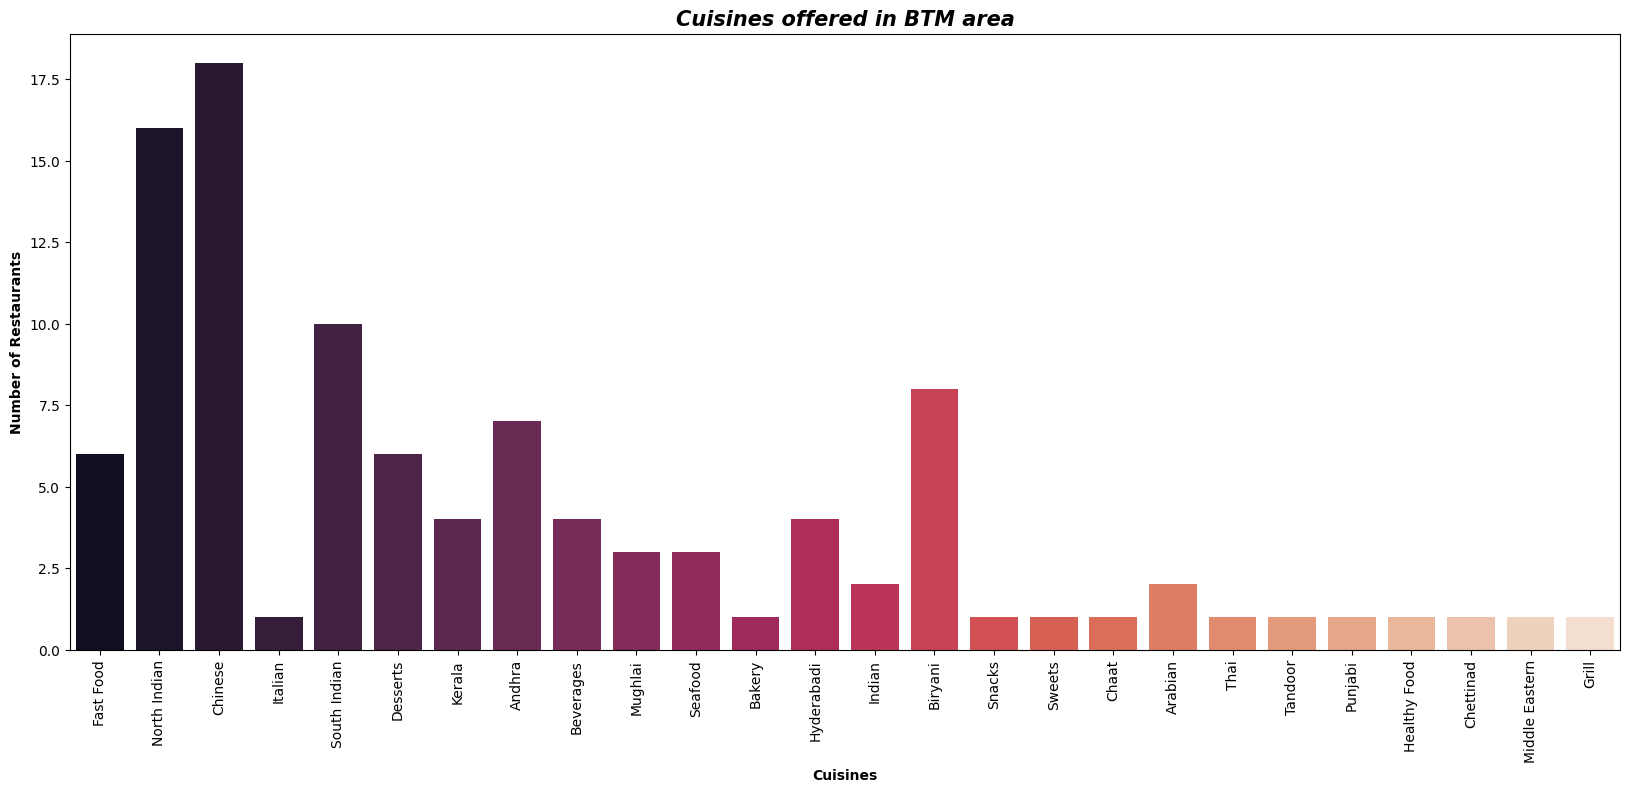

In [294]:
#Plotting for BTM
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_BTM['Cuisine'],
            y=df_Cuisine_BTM['Count'],
            data=df_Cuisine_BTM,
            palette='rocket')
plt.xticks(rotation=90)
plt.title('Cuisines offered in BTM area',fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel('Cuisines',fontsize=10,fontweight='bold')
plt.ylabel('Number of Restaurants',fontsize=10,fontweight='bold')
plt.show()

In [295]:
#Pie chart for top 10 Cuisines in BTM
fig=px.pie(data_frame=df_Cuisine_BTM,
           names=df_Cuisine_BTM['Cuisine'][:10],
           values=df_Cuisine_BTM['Count'][:10],
           title='Distribution of Cuisines in Restaurants in BTM',
           width=700,height=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [296]:
#HSR area
freq_HSR={} #empty dict
for i in df_HSR['Cuisine'].unique():
    Cuisines_list=i.split(',') #separating by comma into a list
    for Cuisine in Cuisines_list:
        Cuisine=Cuisine.lstrip(' ') #removing space from the left
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine]+=1
        else:
            freq_HSR[Cuisine]=1
print(freq_HSR)
print()
print('Total Record: \t',len(freq_HSR))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

Total Record: 	 24


In [287]:
#Extracting Cuisine name and their Frequencies for HSR
Cuisine=freq_HSR.keys()
freq=freq_HSR.values()

dict_HSR={'Cuisine':Cuisine, 'Count':freq} 

df_Cuisine_HSR=pd.DataFrame(dict_HSR)
df_Cuisine_HSR.head()

,Cuisine,Count
0,North Indian,6
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3


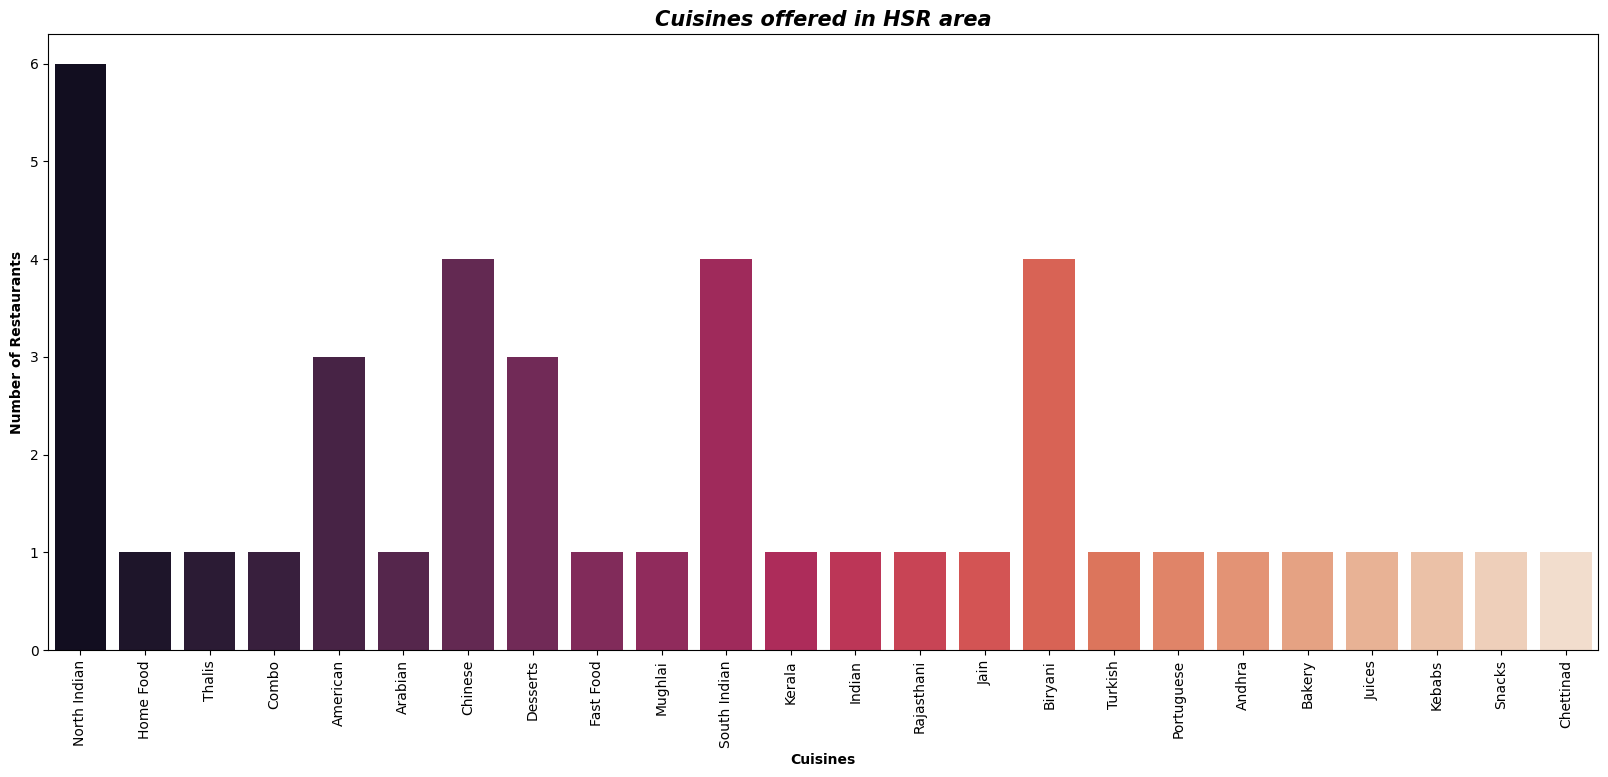

In [297]:
#Plotting for HSR
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_HSR['Cuisine'],
            y=df_Cuisine_HSR['Count'],
            data=df_Cuisine_HSR,
            palette='rocket')
plt.xticks(rotation=90)
plt.title('Cuisines offered in HSR area',fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel('Cuisines',fontsize=10,fontweight='bold')
plt.ylabel('Number of Restaurants',fontsize=10,fontweight='bold')
plt.show()

In [298]:
#Pie chart for top 10 Cuisines in HSR
fig=px.pie(data_frame=df_Cuisine_HSR,
           names=df_Cuisine_HSR['Cuisine'][:10],
           values=df_Cuisine_HSR['Count'][:10],
           title='Distribution of Cuisines in Restaurants in HSR',
           width=700,height=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [299]:
#Koramangala
freq_KM={} #empty dict
for i in df_Koramangala['Cuisine'].unique():
    Cuisines_list=i.split(',') #separating by comma into a list
    for Cuisine in Cuisines_list:
        Cuisine=Cuisine.lstrip(' ') #removing space from the left
        if Cuisine in freq_KM:
            freq_KM[Cuisine]+=1
        else:
            freq_KM[Cuisine]=1
print(freq_KM)
print()
print('Total Record: \t',len(freq_KM))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

Total Record: 	 42


In [300]:
#Extracting Cuisine name and their Frequencies for BTM
Cuisine=freq_KM.keys()
freq=freq_KM.values()

dict_KM={'Cuisine':Cuisine, 'Count':freq} 

df_Cuisine_KM=pd.DataFrame(dict_KM)
df_Cuisine_KM.head()

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5


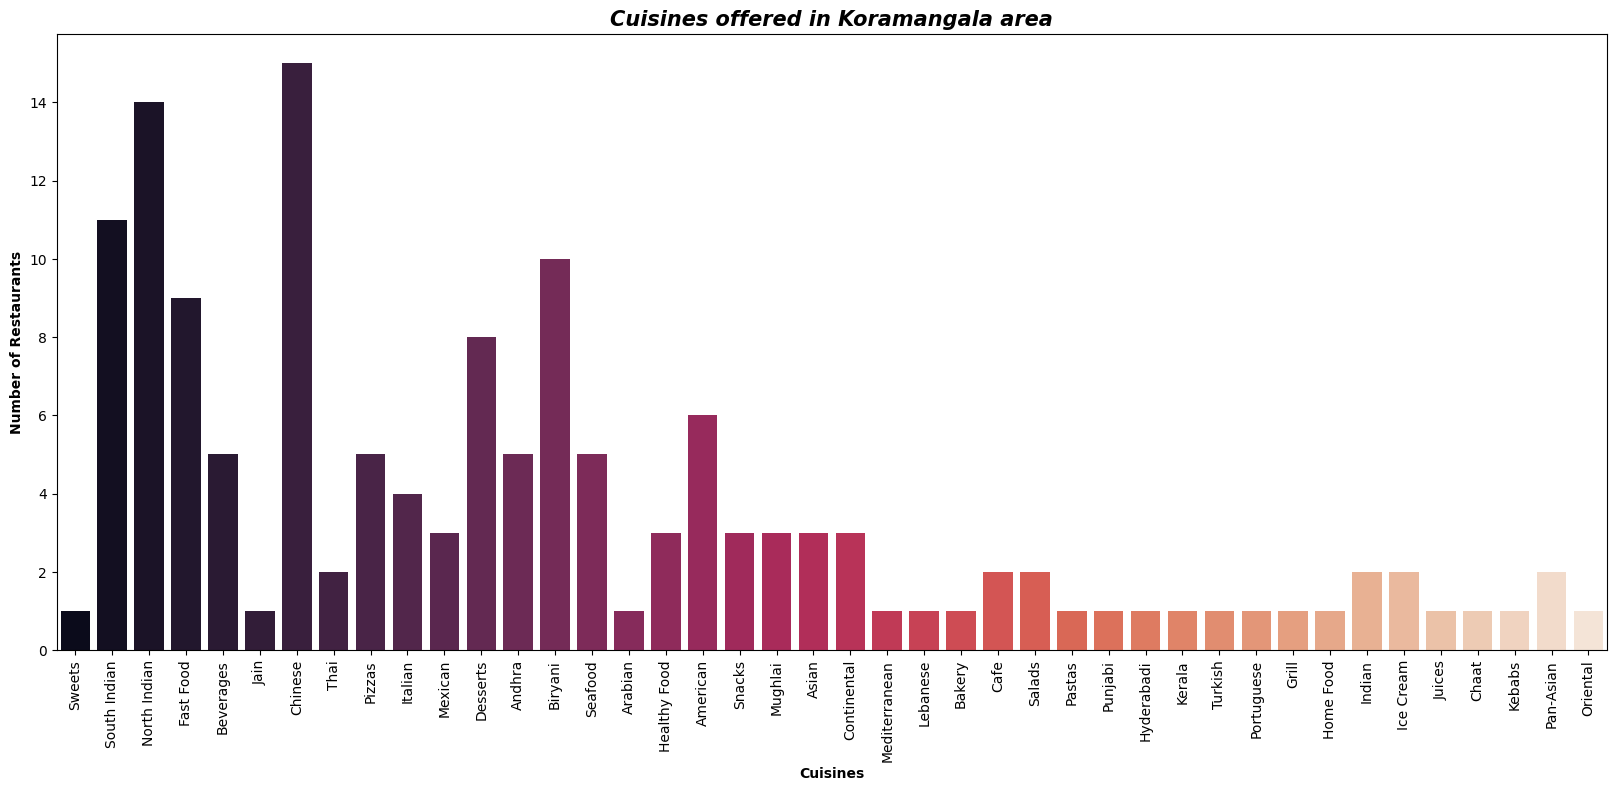

In [301]:
#Plotting for Koramangala
plt.figure(figsize=(20,8))
sns.barplot(x=df_Cuisine_KM['Cuisine'],
            y=df_Cuisine_KM['Count'],
            data=df_Cuisine_KM,
            palette='rocket')
plt.xticks(rotation=90)
plt.title('Cuisines offered in Koramangala area',fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel('Cuisines',fontsize=10,fontweight='bold')
plt.ylabel('Number of Restaurants',fontsize=10,fontweight='bold')
plt.show()

In [302]:
#Pie chart for top 10 Cuisines in Koramangala
fig=px.pie(data_frame=df_Cuisine_KM,
           names=df_Cuisine_KM['Cuisine'][:10],
           values=df_Cuisine_KM['Count'][:10],
           title='Distribution of Cuisines in Restaurants in Koramangala',
           width=700,height=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()